In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
advertising_data=pd.read_csv('C:/Users/shubham.chhetri/Desktop/MYPROJECT/Machine learning/Designing a ML model/Advertising.csv')
advertising_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advertising_data.shape

(200, 5)

In [4]:
advertising_data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


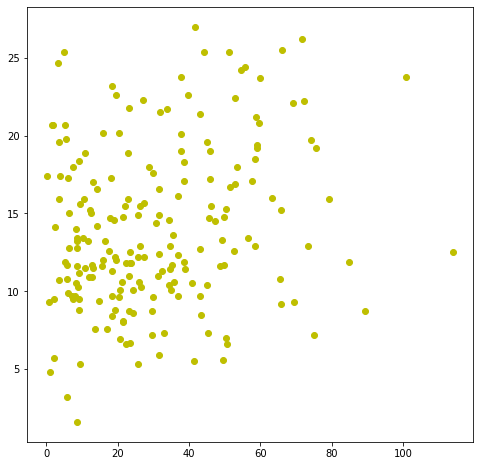

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(advertising_data['newspaper'],advertising_data['sales'],c='y')
plt.show()

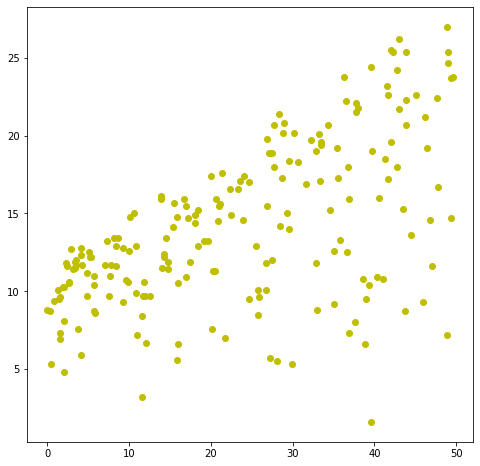

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(advertising_data['radio'],advertising_data['sales'],c='y')
plt.show()

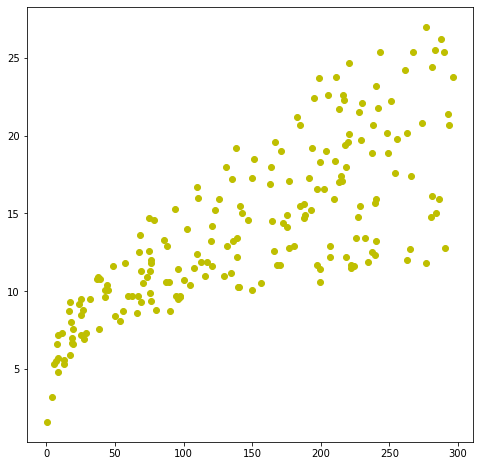

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(advertising_data['TV'],advertising_data['sales'],c='y')
plt.show()

In [8]:
advertising_data_correlation=advertising_data.corr()
advertising_data_correlation

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


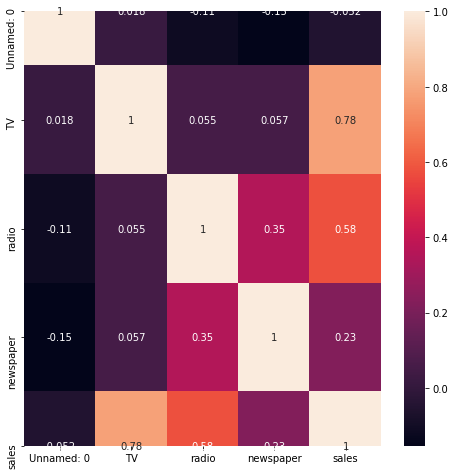

In [9]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(advertising_data_correlation,annot=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
x=advertising_data['TV'].values.reshape(-1,1)
y=advertising_data['sales'].values.reshape(-1,1)

In [12]:
x.shape,y.shape

((200, 1), (200, 1))

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
x_train.shape,y_train.shape

((140, 1), (140, 1))

In [15]:
x_test.shape,y_test.shape

((60, 1), (60, 1))

In [16]:
!pip install statsmodels

In [17]:
import statsmodels.api as sm

In [18]:
x_train_with_intercept=sm.add_constant(x_train)
stats_model=sm.OLS(y_train,x_train_with_intercept)
fit_model=stats_model.fit()
print(fit_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           4.76e-26
Time:                        00:39:08   Log-Likelihood:                -371.64
No. Observations:                 140   AIC:                             747.3
Df Residuals:                     138   BIC:                             753.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3108      0.611     11.957      0.0

In [19]:
linear_reg=LinearRegression(normalize=True).fit(x_train,y_train)

In [21]:
print("Training score",linear_reg.score(x_train,y_train))

Training score 0.5552336104251212


In [23]:
y_pred=linear_reg.predict(x_test)

In [24]:
from sklearn.metrics import r2_score
print("testing score",r2_score(y_test,y_pred))

testing score 0.725606346597073


In [25]:
def adjusted_r2(r_square,labels,features):
    adj_r_square=1-((1-r_square) * (len(labels)-1)) / (len(labels)- features.shape[1]-1)
    return adj_r_square

In [26]:
print("Adjusted R2 score",adjusted_r2(r2_score(y_test,y_pred),y_test,x_test))

Adjusted R2 score 0.7208754215384019


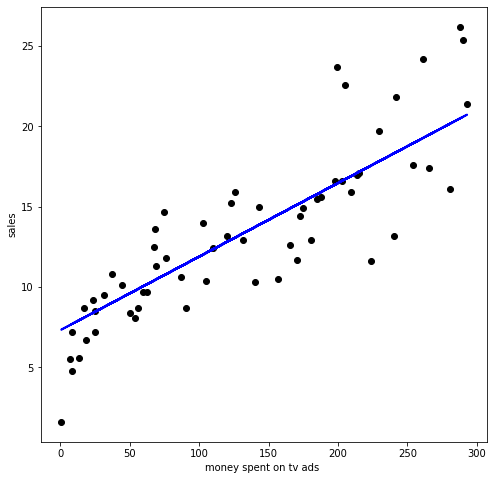

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(x_test,y_test,c='black')
plt.plot(x_test,y_pred,c='blue',linewidth=2)
plt.xlabel("money spent on tv ads ")
plt.ylabel("sales")
plt.show()

Multiple regression

In [28]:
x=advertising_data.drop(['Unnamed: 0','sales'],axis=1)
y=advertising_data['sales']

In [29]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [31]:
x.shape,y.shape

((200, 3), (200,))

In [32]:
x_test.shape,y_test.shape

((60, 3), (60,))

In [33]:
x_train_with_intercept=sm.add_constant(x_train)
stats_model=sm.OLS(y_train,x_train_with_intercept)
fit_model=stats_model.fit()
print(fit_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     427.7
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           4.94e-69
Time:                        00:51:28   Log-Likelihood:                -270.58
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             560.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7679      0.369      7.499      0.0

C:\Users\shubham.chhetri\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
linear_reg=LinearRegression(normalize=True).fit(x_train,y_train)
linear_reg

LinearRegression(normalize=True)

In [35]:
print("Training score",linear_reg.score(x_train,y_train))

Training score 0.9041640478335595


In [36]:
y_pred=linear_reg.predict(x_test)

In [37]:
print("testing score",r2_score(y_test,y_pred))

testing score 0.8712505136318935


In [38]:
print("Adjusted R2 score",adjusted_r2(r2_score(y_test,y_pred),y_test,x_test))

Adjusted R2 score 0.8643532197193164
